# Fraud Detection of Credit Cards

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### https://www.kaggle.com/mlg-ulb/creditcardfraud

In [7]:
df = pd.read_csv('creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.shape

(284807, 31)

In [10]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [19]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
#fraud and normal dataset
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [17]:
normal.shape

(284315, 31)

In [18]:
fraud.shape

(492, 31)

In [22]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

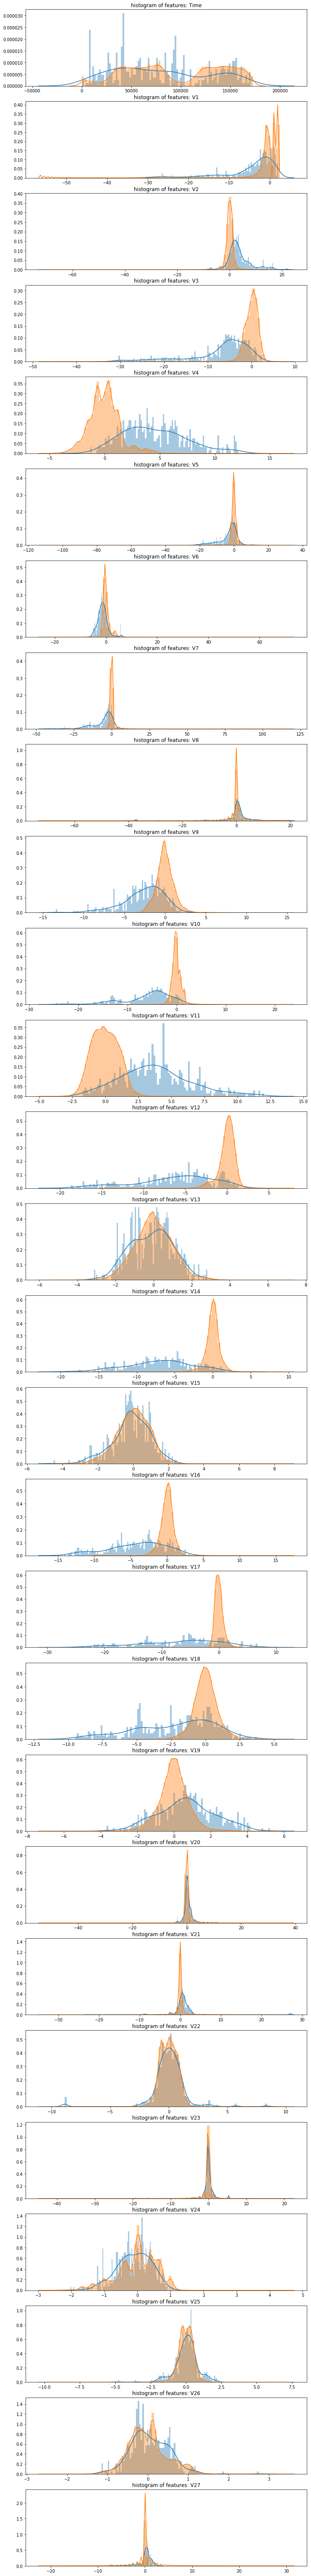

In [26]:
from matplotlib import gridspec
features = df.iloc[:, 0:28].columns

plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i , c in enumerate(df[features]):
  ax= plt.subplot(gs[i])
  sns.distplot(df[c][df.Class==1], bins=100)
  sns.distplot(df[c][df.Class==0], bins=100)
  ax.set_xlabel('')
  ax.set_title('histogram of features: '+ str(c))

plt.show()


In [32]:
#Taking a fraction of data
df1 = df.sample(frac = 0.25, random_state= 1)
df1.shape

(71202, 31)

In [33]:
#fraud and valid transactions
Fraud = df1[df1['Class']==1]
Valid = df1[df1['Class']==0]
outliers= len(Fraud)/float(len(Valid))

In [34]:
print(outliers)
print('Fraud cases: {}'. format(len(Fraud)))
print('Valid cases: {}'. format(len(Valid)))

0.0015613790775203613
Fraud cases: 111
Valid cases: 71091


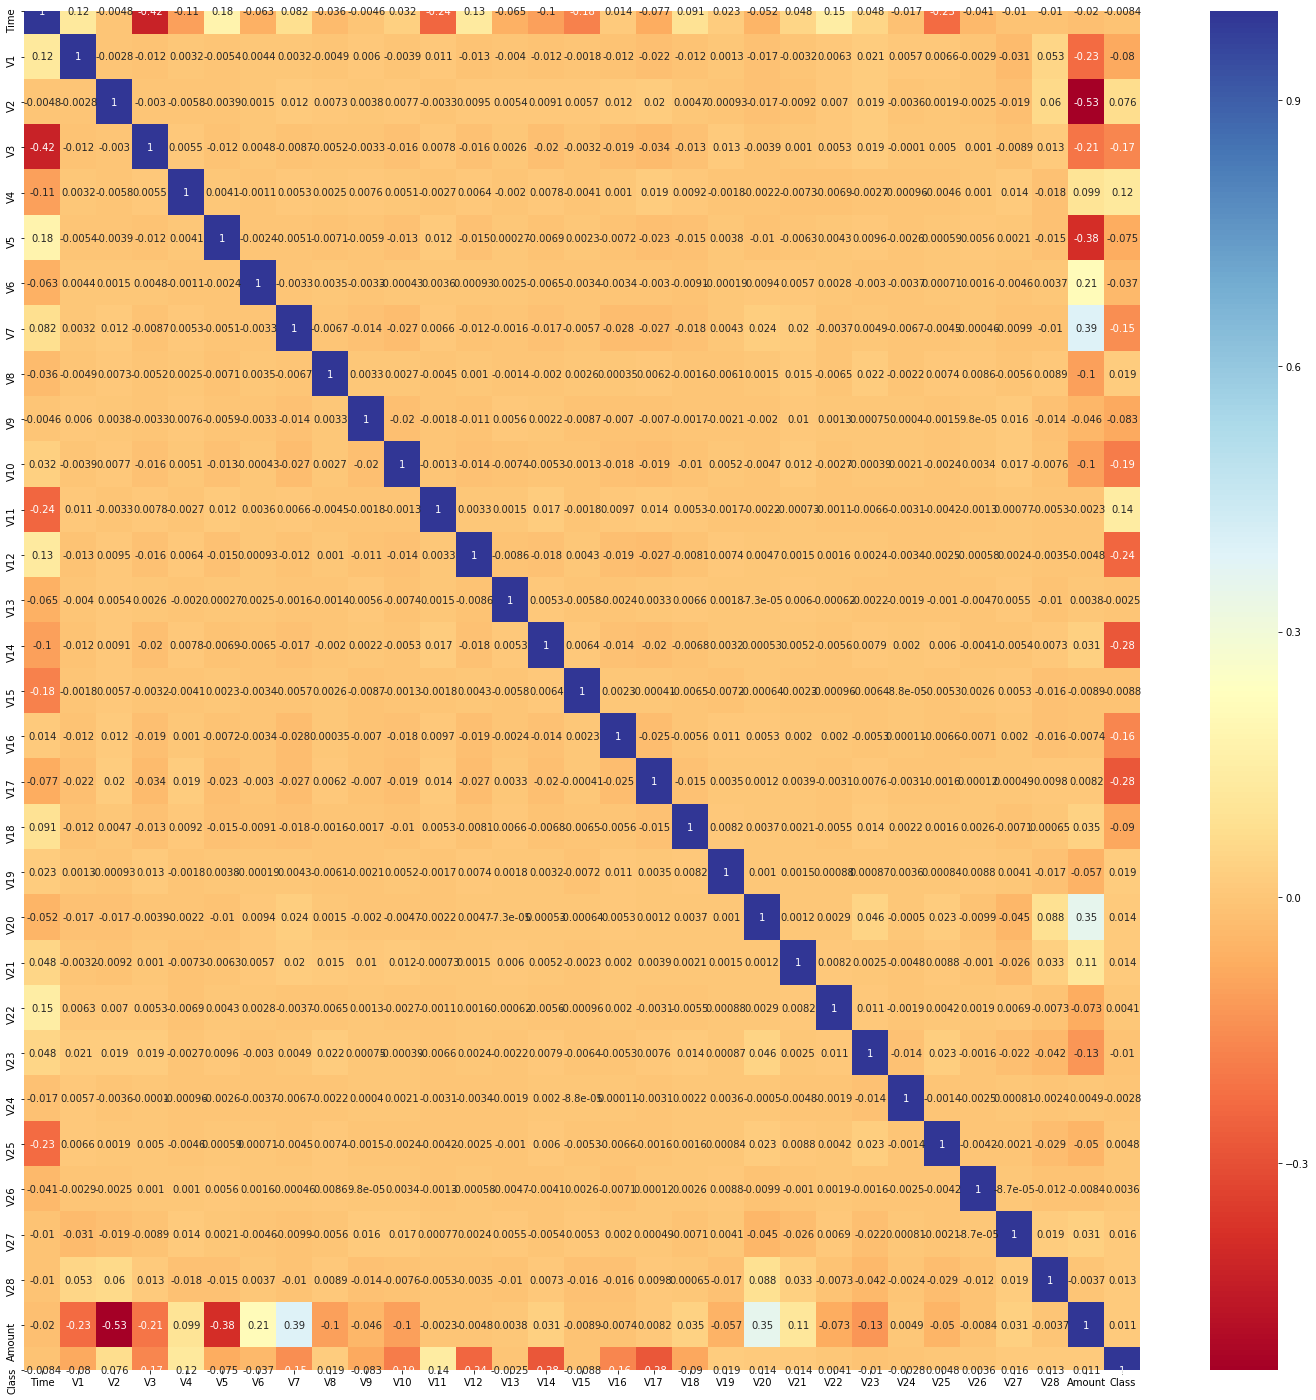

In [39]:
#correlation
corrmat = df1.corr()
top_corr_features= corrmat.index
plt.figure(figsize= (25,25))
#heat map
g= sns.heatmap(df1[top_corr_features].corr(), annot=True, cmap='RdYlBu')

In [61]:
#seperating Class column from dataset
X= df.drop(['Class'], axis=1)
Y= df['Class']

X_data = X.values
Y_data = Y.values

In [62]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [63]:
X_data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [64]:
Y_data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
#split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

# Model

In [66]:
from sklearn import linear_model

# ***Logistic Regression***

In [67]:
classifier1 = linear_model.LogisticRegression(C=1e5)

In [68]:
classifier1.fit(X_train, Y_train)

C:\Users\abder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = np.array(classifier1.predict(X_test)) 

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [72]:
print(confusion_matrix(Y_test, y_pred))

[[56853    11]
 [   46    52]]


In [73]:
print(accuracy_score(Y_test, y_pred))

0.9989993328885924


In [74]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.53      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



# ***Random Forest Classifier***

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
classifier2 = RandomForestClassifier(random_state=0)
classifier2.fit(X_train, Y_train);


C:\Users\abder\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
y2_pred = np.array(classifier2.predict(X_test)) 

In [82]:
print(confusion_matrix(Y_test, y2_pred))

[[56861     3]
 [   24    74]]


In [88]:
print(classification_report(Y_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# ***Naive Baiye Classifier***

In [84]:
from sklearn.naive_bayes import BernoulliNB

In [85]:
classifier3 = BernoulliNB()
classifier3.fit(X_train, Y_train);

In [86]:
y3_pred = np.array(classifier3.predict(X_test)) 

In [87]:
print(confusion_matrix(Y_test, y3_pred))

[[56849    15]
 [   36    62]]


In [89]:
print(classification_report(Y_test, y3_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.63      0.71        98

    accuracy                           1.00     56962
   macro avg       0.90      0.82      0.85     56962
weighted avg       1.00      1.00      1.00     56962

